In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
import requests

def read_access_token(file_path):
    with open(file_path, 'r') as file:
        return file.read().strip()
    
access_token = read_access_token('access_token.txt')


def get_spotify_user_profile(access_token):
    url = 'https://api.spotify.com/v1/me'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()  # Returns user profile data
    else:
        print(f"Error fetching user profile: {response.status_code}")
        print(f"Response: {response.text}")
        return None

user_profile = get_spotify_user_profile(access_token)
print(user_profile)

def get_spotify_top_data(access_token, data_type='tracks'):
    url = f'https://api.spotify.com/v1/me/top/{data_type}'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return [item['id'] for item in response.json()['items']]
    else:
        # Log the status code and response for debugging
        print(f"Error fetching top {data_type}: {response.status_code}")
        print(f"Response: {response.json()}")
        return []


access_token = read_access_token('access_token.txt')
top_tracks = get_spotify_top_data(access_token, 'tracks')
top_artists = get_spotify_top_data(access_token, 'artists')

{'display_name': 'santiagofischel', 'external_urls': {'spotify': 'https://open.spotify.com/user/santiagofischel'}, 'href': 'https://api.spotify.com/v1/users/santiagofischel', 'id': 'santiagofischel', 'images': [{'url': 'https://i.scdn.co/image/ab67757000003b82767ddaf83ec34926931494c7', 'height': 64, 'width': 64}, {'url': 'https://i.scdn.co/image/ab6775700000ee85767ddaf83ec34926931494c7', 'height': 300, 'width': 300}], 'type': 'user', 'uri': 'spotify:user:santiagofischel', 'followers': {'href': None, 'total': 68}}


In [25]:
def get_playlist_tracks(access_token, playlist_id):
    url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    return [item['track']['id'] for item in response.json()['items']] if response.status_code == 200 else []

# Get all playlists
def get_all_user_playlists(access_token):
    url = 'https://api.spotify.com/v1/me/playlists'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    playlists = response.json()['items'] if response.status_code == 200 else []
    return playlists

# Fetch all tracks from all playlists
def get_all_tracks_from_playlists(access_token):
    playlists = get_all_user_playlists(access_token)
    all_tracks = set()
    for playlist in playlists:
        tracks = get_playlist_tracks(access_token, playlist['id'])
        all_tracks.update(tracks)
    return all_tracks

access_token = read_access_token('access_token.txt')  # Update the path to your access token file
playlist_tracks = get_all_tracks_from_playlists(access_token)


In [26]:
playlist_tracks

{'00NAQYOP4AmWR549nnYJZu',
 '00hdjyXt6MohKnCyDmhxOL',
 '01DOm09B2AbiTARAbXVI6g',
 '03t183ijgT3kua3Bk7XHpP',
 '06s3QtMJVXw1AJX3UfvZG1',
 '07w6jp4Fq8GGqhLoDYoVkb',
 '0AjNBgkkdeUyj4HucyGRr8',
 '0DMRKqrpd0QO4RWiEdMib0',
 '0ESJlaM8CE1jRWaNtwSNj8',
 '0G4QCpJMA6u8MGXxzg4gm9',
 '0GONea6G2XdnHWjNZd6zt3',
 '0GbrwlmnRMJOQ5bRV9QcZa',
 '0HB4odbGJbgR0ffA4rJoxS',
 '0HDudjyoG3UpWIMAJrXIaB',
 '0I3q5fE6wg7LIfHGngUTnV',
 '0L7UzdYmOkLhHoDLEcUa8f',
 '0Nwar8rweBUyfyuoyjjUvk',
 '0OIkGLJOrJtrQ9pm805I5m',
 '0P6AWOA4LG1XOctzaVu5tt',
 '0RbW8kWozrVSIGb4V13o0o',
 '0S9ZVNTNRzLMgb96tmmG1u',
 '0SbDNXZYqfsMarINcb72X5',
 '0SqqAgdovOE24BzxIClpjw',
 '0V4l4GQhgnWQGtCWpvA7va',
 '0W1jh3ExLv0nMvvmNJOBxh',
 '0Wi7iEDGFY7I7NkYU6gS4n',
 '0aVrpFRLlrd5zVyPXWP3mS',
 '0aym2LBJBk9DAYuHHutrIl',
 '0bRXwKfigvpKZUurwqAlEh',
 '0c64nOsaJu7LSrX9pI4124',
 '0dFdGPVLs3k0z9ezYWZzUa',
 '0dWOFwdXrbBUYqD9DLsoyK',
 '0dbTQYW3Ad1FTzIA9t90E8',
 '0eXIlXgGQTD6hezaxdl3wO',
 '0gzqZ9d1jIKo9psEIthwXe',
 '0h4jHdNzUrV9eGR2PT5R8c',
 '0jeS8PyyIRAG0A3t5DtL71',
 

In [3]:

file_path = 'dataset_ready.csv'
final_df = pd.read_csv(file_path)


In [4]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
final_df

,user,song,title,play_count,release,artist_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6228,2563,2483,256,1606,441,0.0,0.508623,0.585005,6.0,0.585438,0.0,0.043825,0.043059,0.448381,0.214305,0.403463,4.859944
1,7366,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,0.247420,0.0,0.043634,0.598287,0.900810,0.110647,0.063820,4.872973
2,1019,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,0.247420,0.0,0.043634,0.598287,0.900810,0.110647,0.063820,4.872973
3,5496,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,0.247420,0.0,0.043634,0.598287,0.900810,0.110647,0.063820,4.872973
4,3821,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,0.247420,0.0,0.043634,0.598287,0.900810,0.110647,0.063820,4.872973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8350,2559,1111,1,268,1816,9.0,0.556181,0.597187,11.0,0.759105,2.0,0.030917,0.550431,0.000000,0.390013,0.677526,4.870791
8996,8493,2560,1797,1,516,1154,0.0,0.436318,0.520578,6.0,0.689651,2.0,0.094219,0.416735,0.000000,0.449163,0.500169,4.666322
8997,5255,2561,1563,1,1568,2079,49.0,0.285931,0.639746,6.0,0.864981,2.0,0.068780,0.375006,0.000994,0.239017,0.408793,5.048939
8998,5455,2562,1584,1,379,1102,46.0,0.645531,0.604862,10.0,0.768579,2.0,0.198031,0.198031,0.000000,0.305276,0.642380,5.017214


In [9]:
zero_play_count = final_df[final_df['play_count'] == 1]

print(f"There are {len(zero_play_count)} rows where play_count is 0.")

There are 8999 rows where play_count is 0.


/var/folders/gr/q7qsw30x1xqd0zv1tj58r0vw0000gn/T/ipykernel_19901/857139670.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['play_count'])
/Users/santiagofischel/anaconda3/envs/reco/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='play_count', ylabel='Density'>

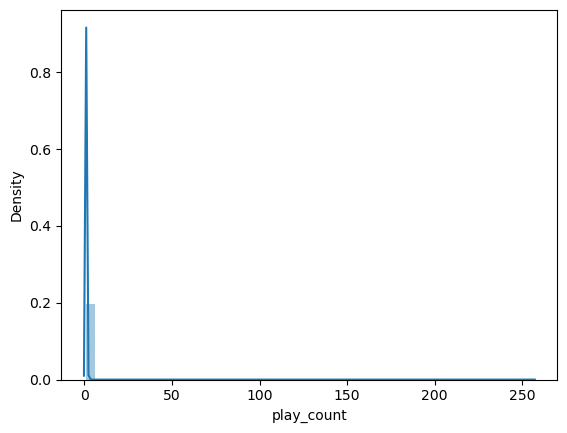

In [7]:
import seaborn as sns

sns.distplot(final_df['play_count'])

In [10]:
import requests
import pandas as pd

def read_access_token(file_path):
    with open(file_path, 'r') as file:
        return file.read().strip()

access_token = read_access_token('access_token.txt')



In [29]:
def get_spotify_top_data(access_token, data_type='tracks', limit=50):
    url = f'https://api.spotify.com/v1/me/top/{data_type}'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers, params={'limit': limit})
    
    if response.status_code == 200:
        items = response.json()['items']
        return [item['id'] for item in items], [item for item in items]
    else:
        print(f"Error fetching top {data_type}: {response.status_code}")
        return [], []

top_tracks_ids, top_tracks_items = get_spotify_top_data(access_token, 'tracks')
top_artists_ids, _ = get_spotify_top_data(access_token, 'artists')


In [30]:
def fetch_audio_features(track_ids):
    url = 'https://api.spotify.com/v1/audio-features'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers, params={'ids': ','.join(track_ids)})
    
    if response.status_code == 200:
        return response.json()['audio_features']
    else:
        print(f"Error fetching audio features: {response.status_code}")
        return []

audio_features = fetch_audio_features(top_tracks_ids)


In [31]:
def aggregate_user_profile(audio_features):
    # Convert the list of audio features into a DataFrame
    features_df = pd.DataFrame(audio_features)
    
    # Select relevant features for aggregation
    relevant_features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness', 'liveness']
    profile = features_df[relevant_features].mean().to_dict()
    
    return profile

user_profile = aggregate_user_profile(audio_features)
print(user_profile)


{'danceability': 0.6309400000000001, 'energy': 0.6156400000000001, 'valence': 0.6014400000000001, 'tempo': 117.07244, 'acousticness': 0.29918, 'instrumentalness': 0.08284788539999999, 'speechiness': 0.15499000000000002, 'liveness': 0.250442}


In [32]:
def aggregate_user_profile(audio_features):
    # Convert the list of audio features into a DataFrame
    features_df = pd.DataFrame(audio_features)
    
    # Select relevant features for aggregation
    relevant_features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness', 'liveness']
    profile = features_df[relevant_features].mean().to_dict()
    
    return profile

user_profile = aggregate_user_profile(audio_features)
print(user_profile)


{'danceability': 0.6309400000000001, 'energy': 0.6156400000000001, 'valence': 0.6014400000000001, 'tempo': 117.07244, 'acousticness': 0.29918, 'instrumentalness': 0.08284788539999999, 'speechiness': 0.15499000000000002, 'liveness': 0.250442}


In [122]:
for feature in user_profile.keys():
    # Creating a new column for each differential feature
    final_df[f'{feature}_diff'] = abs(final_df[feature] - user_profile[feature])

In [129]:
final_df

,user,song,title,play_count,release,artist_name,year,danceability,energy,key,...,danceability_diff,energy_diff,valence_diff,tempo_diff,acousticness_diff,instrumentalness_diff,speechiness_diff,liveness_diff,play_count_sqrt,play_count_inv
0,6228,2563,2483,256,1606,441,0.0,0.508623,0.585005,6.0,...,0.122317,0.030635,0.197977,112.212496,0.256121,0.365533,0.111165,0.036137,16.0,0.003906
1,7366,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,...,0.402212,0.612545,0.537620,112.199467,0.299107,0.817962,0.111356,0.139795,1.0,1.000000
2,1019,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,...,0.402212,0.612545,0.537620,112.199467,0.299107,0.817962,0.111356,0.139795,1.0,1.000000
3,5496,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,...,0.402212,0.612545,0.537620,112.199467,0.299107,0.817962,0.111356,0.139795,1.0,1.000000
4,3821,0,1569,1,554,259,51.0,0.228728,0.003095,10.0,...,0.402212,0.612545,0.537620,112.199467,0.299107,0.817962,0.111356,0.139795,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8350,2559,1111,1,268,1816,9.0,0.556181,0.597187,11.0,...,0.074759,0.018453,0.076086,112.201649,0.251251,0.082848,0.124073,0.139571,1.0,1.000000
8996,8493,2560,1797,1,516,1154,0.0,0.436318,0.520578,6.0,...,0.194622,0.095062,0.101271,112.406118,0.117555,0.082848,0.060771,0.198721,1.0,1.000000
8997,5255,2561,1563,1,1568,2079,49.0,0.285931,0.639746,6.0,...,0.345009,0.024106,0.192647,112.023501,0.075826,0.081854,0.086210,0.011425,1.0,1.000000
8998,5455,2562,1584,1,379,1102,46.0,0.645531,0.604862,10.0,...,0.014591,0.010778,0.040940,112.055226,0.101149,0.082848,0.043041,0.054834,1.0,1.000000


In [91]:
from sklearn.model_selection import train_test_split

predictor_columns = ['song','danceability_diff', 'energy_diff', 'valence_diff', 'tempo_diff', 'acousticness_diff', 'instrumentalness_diff', 'speechiness_diff', 'liveness_diff']

X = final_df[predictor_columns]

y = final_df['play_count_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
import lightgbm as lgb

# Convert the datasets into LightGBM dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set the parameters for the model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.10,
    'feature_fraction': 0.9,
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2229
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 9
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because th

In [93]:
# Predict on the test set
y_pred = bst.predict(X_test)


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.11445534186228136
MAE: 0.0026977401827243046


In [95]:
# Create a copy of X_test to avoid modifying the original DataFrame
recommended_songs = X_test.copy()

# Add the predicted play_count_log to this new DataFrame
recommended_songs['predicted_play_count_log'] = y_pred


In [106]:
# Sort by predicted_play_count_log in descending order
recommended_songs = recommended_songs.sort_values(by='predicted_play_count_log', ascending=False)

# Drop duplicate 'song' values, keep the first occurrence
recommended_songs = recommended_songs.drop_duplicates(subset='song', keep='first')

In [117]:
# Display the top 10 recommended songs
top_10_recommendations = recommended_songs.head(1000)

In [118]:
# Merge top_10_recommendations with final_df to get song title and artist names
top_10_with_names = top_10_recommendations.merge(final_df[['song', 'title', 'artist_name']], on='song', how='left')
# Drop duplicate 'title' values, keep the first occurrence
top_10_with_names = top_10_with_names.drop_duplicates(subset='title', keep='first')

In [119]:
top_10_with_names

,song,danceability_diff,energy_diff,valence_diff,tempo_diff,acousticness_diff,instrumentalness_diff,speechiness_diff,liveness_diff,predicted_play_count_log,title,artist_name
0,2340,0.083397,0.006418,0.426647,112.260231,0.297591,0.423225,0.114808,0.143383,0.693147,193,1602
3,253,0.186113,0.160598,0.314566,112.334466,0.157765,0.126038,0.113947,0.059927,0.693147,982,338
4,1683,0.315400,0.357902,0.460809,112.809380,0.145601,0.082540,0.097571,0.161790,0.693147,436,395
11,289,0.196564,0.096846,0.170957,112.432955,0.294302,0.053496,0.123394,0.144973,0.693147,596,1015
12,1101,0.186113,0.160598,0.314566,112.334466,0.157765,0.126038,0.113947,0.059927,0.693147,1419,890
...,...,...,...,...,...,...,...,...,...,...,...,...
6299,453,0.398242,0.402143,0.550652,111.962472,0.050759,0.072939,0.124558,0.145181,0.693147,1001,1589
6313,414,0.398242,0.402143,0.550652,111.962472,0.050759,0.072939,0.124558,0.145181,0.693147,1765,766
6318,1533,0.315400,0.357129,0.549227,112.345814,0.286939,0.475857,0.123976,0.157225,0.693147,1790,1464
6340,1867,0.122317,0.151277,0.042968,112.477795,0.267197,0.082848,0.191433,0.150597,0.693147,2438,1488


In [13]:
import pandas as pd
file_path = '../popular_songs_metadata.csv'
original_df = pd.read_csv(file_path)